In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

accel_df = pd.read_csv('./dataset/0412_accel.csv')
accel_df.head()

,accel_value,speed,timestamp
0,0,36,2024-04-12 07:28:03.701426+00:00
1,141,33,2024-04-12 07:28:04.063157+00:00
2,145,33,2024-04-12 07:28:05.082944+00:00
3,45,36,2024-04-12 07:28:05.643850+00:00
4,32,36,2024-04-12 07:28:05.644737+00:00


In [2]:
max_accel = max(accel_df['accel_value'])
min_accel = min(accel_df['accel_value'])

# max가 0이면 에러 발생
assert max_accel > 1e-5, 'Sensor Error'

print("Max value: ", max_accel)
print("Min value: ", min_accel)

Max value:  167
Min value:  0


In [3]:
# min_max scaling 진행
normalization_df = (accel_df['accel_value'] - min_accel) / (max_accel - min_accel)
accel_df['normalize'] = normalization_df
accel_df.head()

,accel_value,speed,timestamp,normalize
0,0,36,2024-04-12 07:28:03.701426+00:00,0.000000
1,141,33,2024-04-12 07:28:04.063157+00:00,0.844311
2,145,33,2024-04-12 07:28:05.082944+00:00,0.868263
3,45,36,2024-04-12 07:28:05.643850+00:00,0.269461
4,32,36,2024-04-12 07:28:05.644737+00:00,0.191617


In [4]:
# 이전 값을 빼고 min max scaling
accel_df['shift_speed'] = accel_df['speed'] - accel_df['speed'].shift(1)
accel_df['shift_speed'].fillna(0, inplace = True)

min_shift_speed = min(accel_df['shift_speed'])
max_shift_speed = max(accel_df['shift_speed'])

normalization_speed_df = (accel_df['shift_speed'] - min_shift_speed) / (max_shift_speed - min_shift_speed)

accel_df['normalize_speed'] = normalization_speed_df
accel_df.head()

,accel_value,speed,timestamp,normalize,shift_speed,normalize_speed
0,0,36,2024-04-12 07:28:03.701426+00:00,0.000000,0.0,0.696970
1,141,33,2024-04-12 07:28:04.063157+00:00,0.844311,-3.0,0.606061
2,145,33,2024-04-12 07:28:05.082944+00:00,0.868263,0.0,0.696970
3,45,36,2024-04-12 07:28:05.643850+00:00,0.269461,3.0,0.787879
4,32,36,2024-04-12 07:28:05.644737+00:00,0.191617,0.0,0.696970


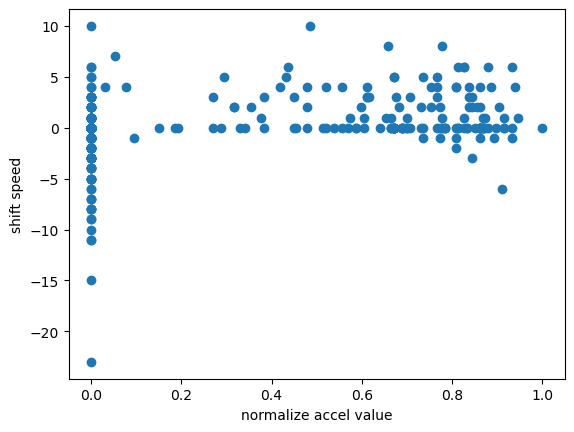

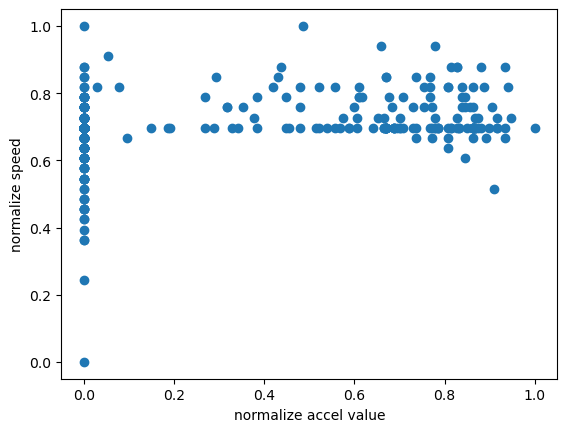

In [5]:
x = accel_df['normalize'].to_list()
y = accel_df['shift_speed'].to_list()
y_shift = accel_df['normalize_speed'].to_list()


plt.figure()
plt.scatter(x, y)
plt.xlabel('normalize accel value')
plt.ylabel('shift speed')
plt.show()

plt.figure()
plt.scatter(x, y_shift)
plt.xlabel('normalize accel value')
plt.ylabel('normalize speed')
plt.show()


In [6]:
# index 추출
index_list = accel_df.index.tolist()

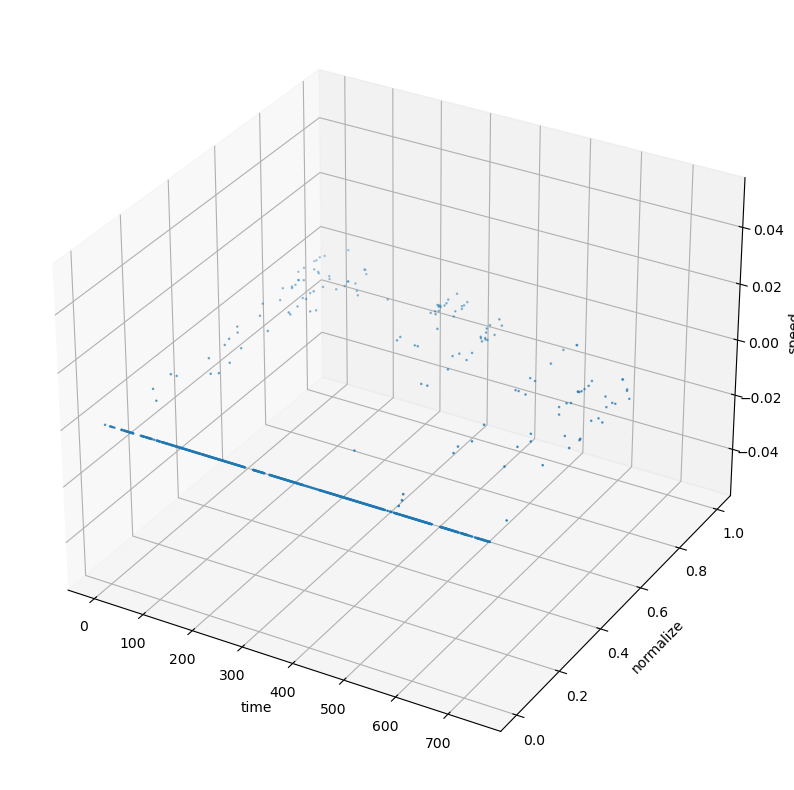

In [7]:
x = index_list
y = accel_df['normalize'].to_list()
z = accel_df['normalize_speed'].to_list()

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x, y, z)
plt.xlabel('time')
plt.ylabel('normalize')
ax.set_zlabel('speed')
plt.show()

